#Telecom Churn

In the highly competitive telecom industry, customer churn—when customers leave one provider for another—is a significant challenge. Churn directly impacts revenue, customer lifetime value, and brand loyalty. Identifying customers who are likely to churn allows companies to implement targeted retention strategies to improve customer satisfaction and minimize losses.

The problem is to develop a machine learning model that can predict customer churn based on historical and behavioral data. This model should analyze various factors, such as customer demographics, service usage patterns, billing details, and customer support interactions, to identify those at risk of leaving the company.

## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read file
df=pd.read_excel(r"/content/Churn (1) (1).xlsx")
df

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [4]:
# drop column Unnamed: 0
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
# first 5 rows after dropping column Unnamed: 0
df.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [6]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   object 
 12  eve.mins        5000 non-null   object 
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

'day.charge' and 'eve.mins' columns are in object type,As both columns contains numerical values,we need to convert them to float type.

In [7]:
# change dtypes
df['day.charge']=df['day.charge'].astype(float)
df['eve.mins']=df['eve.mins'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      4993 non-null   float64
 12  eve.mins        4976 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

Shape of df is (5000, 20).
There are 7 null values in day.charge & 24 in eve.mins

### Null Imputation

<Axes: >

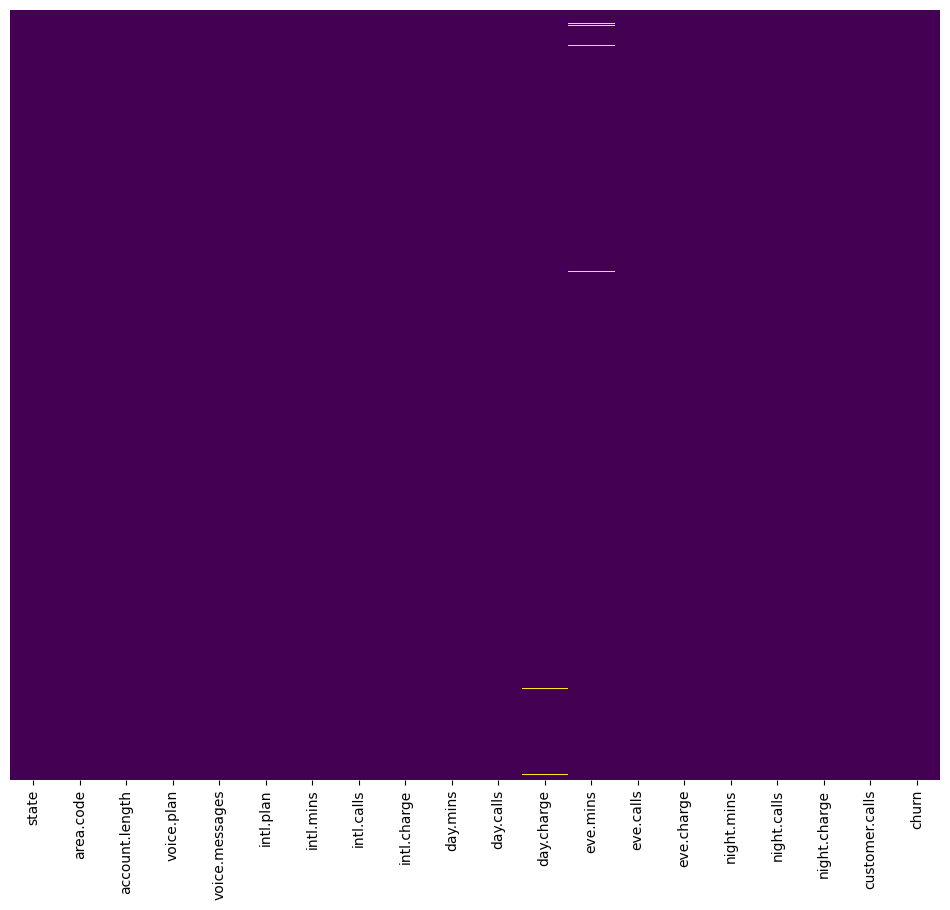

In [8]:
# null heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
# correlation map
df.corr(numeric_only=True)

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
account.length,1.000000,-0.014575,0.001291,0.014277,0.001292,-0.001017,0.028240,-0.000800,-0.008706,0.009143,-0.009587,0.000668,-0.007825,0.000656,-0.001445
voice.messages,-0.014575,1.000000,0.002463,0.000124,0.002505,0.005381,0.000883,0.005140,0.018917,-0.003954,0.019496,0.005541,0.002676,0.005535,-0.007086
intl.mins,0.001291,0.002463,1.000000,0.016791,0.999993,-0.019486,0.013097,-0.019295,-0.000347,-0.007458,0.000132,-0.006721,0.000391,-0.006717,-0.012122
intl.calls,0.014277,0.000124,0.016791,1.000000,0.016900,-0.001303,0.010893,-0.001599,0.008001,0.005574,0.008393,-0.017214,-0.000156,-0.017182,-0.019147
intl.charge,0.001292,0.002505,0.999993,0.016900,1.000000,-0.019415,0.013161,-0.019225,-0.000324,-0.007507,0.000155,-0.006655,0.000368,-0.006650,-0.012180
day.mins,-0.001017,0.005381,-0.019486,-0.001303,-0.019415,1.000000,0.001935,1.000000,-0.010931,0.008128,-0.010760,0.011799,0.004236,0.011783,0.002733
day.calls,0.028240,0.000883,0.013097,0.010893,0.013161,0.001935,1.000000,0.001667,-0.001728,0.003754,-0.000695,0.002804,-0.008308,0.002802,-0.010739
day.charge,-0.000800,0.005140,-0.019295,-0.001599,-0.019225,1.000000,0.001667,1.000000,-0.011568,0.007987,-0.011395,0.011324,0.004209,0.011307,0.002930
eve.mins,-0.008706,0.018917,-0.000347,0.008001,-0.000324,-0.010931,-0.001728,-0.011568,1.000000,0.003117,1.000000,-0.016540,0.015625,-0.016541,-0.012416
eve.calls,0.009143,-0.003954,-0.007458,0.005574,-0.007507,0.008128,0.003754,0.007987,0.003117,1.000000,0.002778,0.001781,-0.013682,0.001799,0.006235


In [10]:
# Null imputation based on results from corr matrix (day.charge with day.mins, eve.charge with eve.mins)
# Both of the above high positive correlation
charge_day=round(df['day.charge']/df['day.mins'],3)
charge_eve=round(df['eve.charge']/df['eve.mins'],3)

avg_charge_day=charge_day.mean()
avg_charge_eve=charge_eve.mean()

df['day.charge'].fillna(df['day.mins']*avg_charge_day,inplace=True)
df['eve.mins'].fillna(df['eve.charge']/avg_charge_eve,inplace=True)

# df.isnull().sum() - Uncomment it to check for null values

### Duplicates Handling

In [11]:
# duplicates
df.duplicated().sum()

0

No duplicates found.

### Outliers Handling

In [12]:
# Listing num_cols for future reference
num_cols=df.select_dtypes(include=np.number).columns
num_cols

Index(['account.length', 'voice.messages', 'intl.mins', 'intl.calls',
       'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins',
       'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls'],
      dtype='object')

In [13]:
# outlier handling
for i in num_cols:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1

    upper_bound=q3+(1.5*iqr)
    lower_bound=q1-(1.5*iqr)

    outliers = df[(df[i] > upper_bound) | (df[i] < lower_bound)]

In [14]:
# shape of outliers
outliers.shape

(399, 20)

Removing outliers as we are having a large dataset of (5000, 20) to work with.

In [15]:
# dropping outliers
df = df.drop(outliers.index)

In [16]:
# new shape of dataset
df.shape

(4601, 20)

### Categorical Variables

In [17]:
# Listing cat_cols for future use
cat_cols=df.select_dtypes(exclude=np.number).columns
cat_cols

Index(['state', 'area.code', 'voice.plan', 'intl.plan', 'churn'], dtype='object')

In [18]:
# value counts for categorical variables
for i in cat_cols:
    print(df[i].value_counts())

state
WV    141
AL    118
MN    117
VA    113
OH    109
ID    108
WY    106
OR    106
UT    105
TX    104
NY    101
WI    101
NJ     99
MA     97
MI     95
MS     93
RI     93
KS     93
KY     92
ME     91
CT     90
MD     90
WA     90
VT     89
MT     89
NH     88
NM     86
DE     86
ND     86
IN     85
NC     85
NV     85
IL     84
CO     84
MO     84
AR     83
TN     83
NE     83
SC     83
FL     83
DC     82
OK     82
AZ     81
SD     80
HI     80
LA     76
GA     74
PA     74
AK     69
IA     60
CA     45
Name: count, dtype: int64
area.code
area_code_415    2299
area_code_408    1155
area_code_510    1147
Name: count, dtype: int64
voice.plan
no     3380
yes    1221
Name: count, dtype: int64
intl.plan
no     4169
yes     432
Name: count, dtype: int64
churn
no     4095
yes     506
Name: count, dtype: int64


In [19]:
# unique number of states
df['state'].nunique()

51

<Axes: xlabel='state', ylabel='count'>

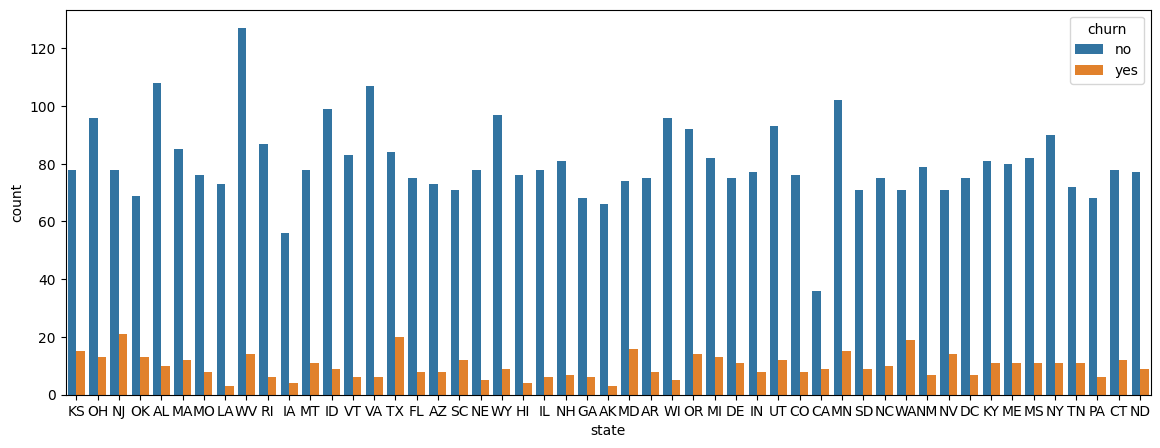

In [20]:
# state hue churn
plt.figure(figsize=(14,5))
sns.countplot(x='state',hue='churn',data=df)

In [21]:
# # predictive power score for state and churn
# !pip install ppscore
# import ppscore as pps
# pps.score(df,'state','churn')

# {'x': 'state',
#  'y': 'churn',
#  'ppscore': 1.0131685886393359e-06,
#  'case': 'classification',
#  'is_valid_score': True,
#  'metric': 'weighted F1',
#  'baseline_score': 0.8382354881853411,
#  'model_score': 0.8382356520800632,
#  'model': DecisionTreeClassifier()}

The PPS value is extremely close to 0, meaning state has negligible or no predictive power for churn. This suggests that knowing the state does not improve the ability to predict whether a customer will churn.

In [22]:
# drop state
df.drop('state',axis=1,inplace=True)

In [23]:
# handling categorical variables
df['intl.plan']=df['intl.plan'].map({'yes':1,'no':0})
df['voice.plan']=df['voice.plan'].map({'yes':1,'no':0})
df['churn']=df['churn'].map({'yes':1,'no':0})

In [24]:
# One hot encoding for area.code
df=pd.get_dummies(df,columns=['area.code'],drop_first=True)

In [25]:
# renaming area.code
df.rename(columns={'area.code_area_code_415':'area_code_415','area.code_area_code_510':'area_code_510'},inplace=True)

In [26]:
# displaying 5 rows
df.head()

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,area_code_415,area_code_510
0,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0,True,False
1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0,True,False
2,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,True,False
3,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0,False,False
4,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,True,False


In [27]:
# charge bool to int
df['area_code_415']=df['area_code_415'].astype(int)
df['area_code_510']=df['area_code_510'].astype(int)

In [28]:
# Statistical summary
df.describe()

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,area_code_415,area_code_510
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,100.203434,0.265377,7.772658,0.093893,10.265920,4.449033,2.772313,180.140078,99.988481,30.624375,200.643557,100.138883,17.054927,200.597327,100.057161,9.026981,1.311671,0.109976,0.499674,0.249294
std,39.815994,0.441582,13.550984,0.291711,2.770301,2.470623,0.747898,53.905866,19.772952,9.163957,50.790725,19.803756,4.317222,50.554291,19.905505,2.274972,0.973906,0.312894,0.500054,0.432651
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,0.000000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.200000,87.000000,14.130000,167.200000,87.000000,7.520000,1.000000,0.000000,0.000000,0.000000
50%,100.000000,0.000000,0.000000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,200.900000,100.000000,17.080000,200.500000,100.000000,9.020000,1.000000,0.000000,0.000000,0.000000
75%,127.000000,1.000000,17.000000,0.000000,12.000000,6.000000,3.240000,216.000000,113.000000,36.720000,234.500000,113.000000,19.930000,235.000000,113.000000,10.580000,2.000000,0.000000,1.000000,0.000000
max,243.000000,1.000000,52.000000,1.000000,20.000000,20.000000,5.400000,351.500000,163.000000,59.760000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,3.000000,1.000000,1.000000,1.000000


## Visualizations

(-1.0999999348944791,
 1.0999994352574243,
 -1.099999798112746,
 1.0999999903863213)

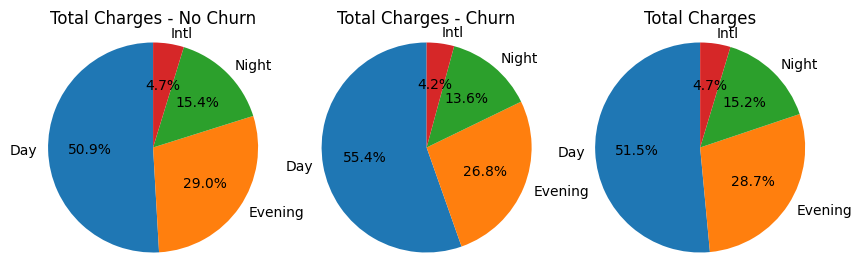

In [29]:
# Charge pie chart
total_day_charge = df['day.charge'].sum()
total_eve_charge = df['eve.charge'].sum()
total_night_charge = df['night.charge'].sum()
total_intl_charge = df['intl.charge'].sum()

total_day_charge1 = df[df['churn']==0]['day.charge'].sum()
total_eve_charge1 = df[df['churn']==0]['eve.charge'].sum()
total_night_charge1 = df[df['churn']==0]['night.charge'].sum()
total_intl_charge1 = df[df['churn']==0]['intl.charge'].sum()

total_day_charge2 = df[df['churn']==1]['day.charge'].sum()
total_eve_charge2 = df[df['churn']==1]['eve.charge'].sum()
total_night_charge2 = df[df['churn']==1]['night.charge'].sum()
total_intl_charge2 = df[df['churn']==1]['intl.charge'].sum()

# Create a list of charges and their corresponding labels
charges = [total_day_charge, total_eve_charge, total_night_charge, total_intl_charge]
charges1 = [total_day_charge1, total_eve_charge1, total_night_charge1, total_intl_charge1]
charges2 = [total_day_charge2, total_eve_charge2, total_night_charge2, total_intl_charge2]
labels = ['Day', 'Evening', 'Night', 'Intl']

# Create the pie chart
fig, axs = plt.subplots(1, 3, figsize=(10, 3))


# plt.figure(figsize=(2.5, 2.5))
axs[0].pie(charges1, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Total Charges - No Churn')
axs[0].axis('equal')
# plt.show()

# plt.figure(figsize=(2.5, 2.5))
axs[1].pie(charges2, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Total Charges - Churn')
axs[1].axis('equal')
# plt.show()

# plt.figure(figsize=(2.5, 2.5))
axs[2].pie(charges, labels=labels, autopct='%1.1f%%', startangle=90)
axs[2].set_title('Total Charges')
axs[2].axis('equal')
# plt.show()

(-1.0999999751450957,
 1.0999997611260186,
 -1.0999999142563495,
 1.099999995916969)

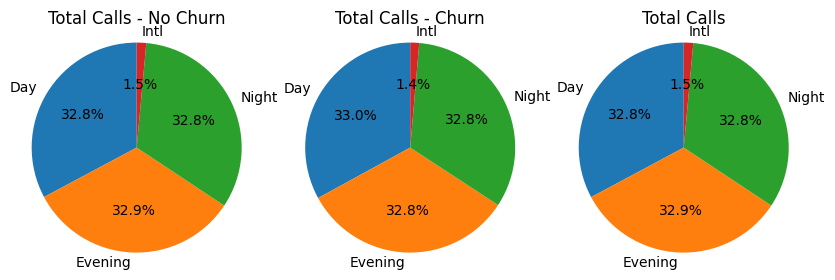

In [30]:
# calls pie chart
total_day_calls = df['day.calls'].sum()
total_eve_calls = df['eve.calls'].sum()
total_night_calls = df['night.calls'].sum()
total_intl_calls = df['intl.calls'].sum()

total_day_calls1 = df[df['churn']==0]['day.calls'].sum()
total_eve_calls1 = df[df['churn']==0]['eve.calls'].sum()
total_night_calls1 = df[df['churn']==0]['night.calls'].sum()
total_intl_calls1 = df[df['churn']==0]['intl.calls'].sum()

total_day_calls2 = df[df['churn']==1]['day.calls'].sum()
total_eve_calls2 = df[df['churn']==1]['eve.calls'].sum()
total_night_calls2 = df[df['churn']==1]['night.calls'].sum()
total_intl_calls2 = df[df['churn']==1]['intl.calls'].sum()

# Create a list of charges and their corresponding labels
calls = [total_day_calls, total_eve_calls, total_night_calls, total_intl_calls]
calls1 = [total_day_calls1, total_eve_calls1, total_night_calls1, total_intl_calls1]
calls2 = [total_day_calls2, total_eve_calls2, total_night_calls2, total_intl_calls2]

labels = ['Day', 'Evening', 'Night', 'Intl']

# Create the pie chart
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

axs[0].pie(calls1, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Total Calls - No Churn')
axs[0].axis('equal')

axs[1].pie(calls2, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Total Calls - Churn')
axs[1].axis('equal')

axs[2].pie(calls, labels=labels, autopct='%1.1f%%', startangle=90)
axs[2].set_title('Total Calls')
axs[2].axis('equal')

<Axes: >

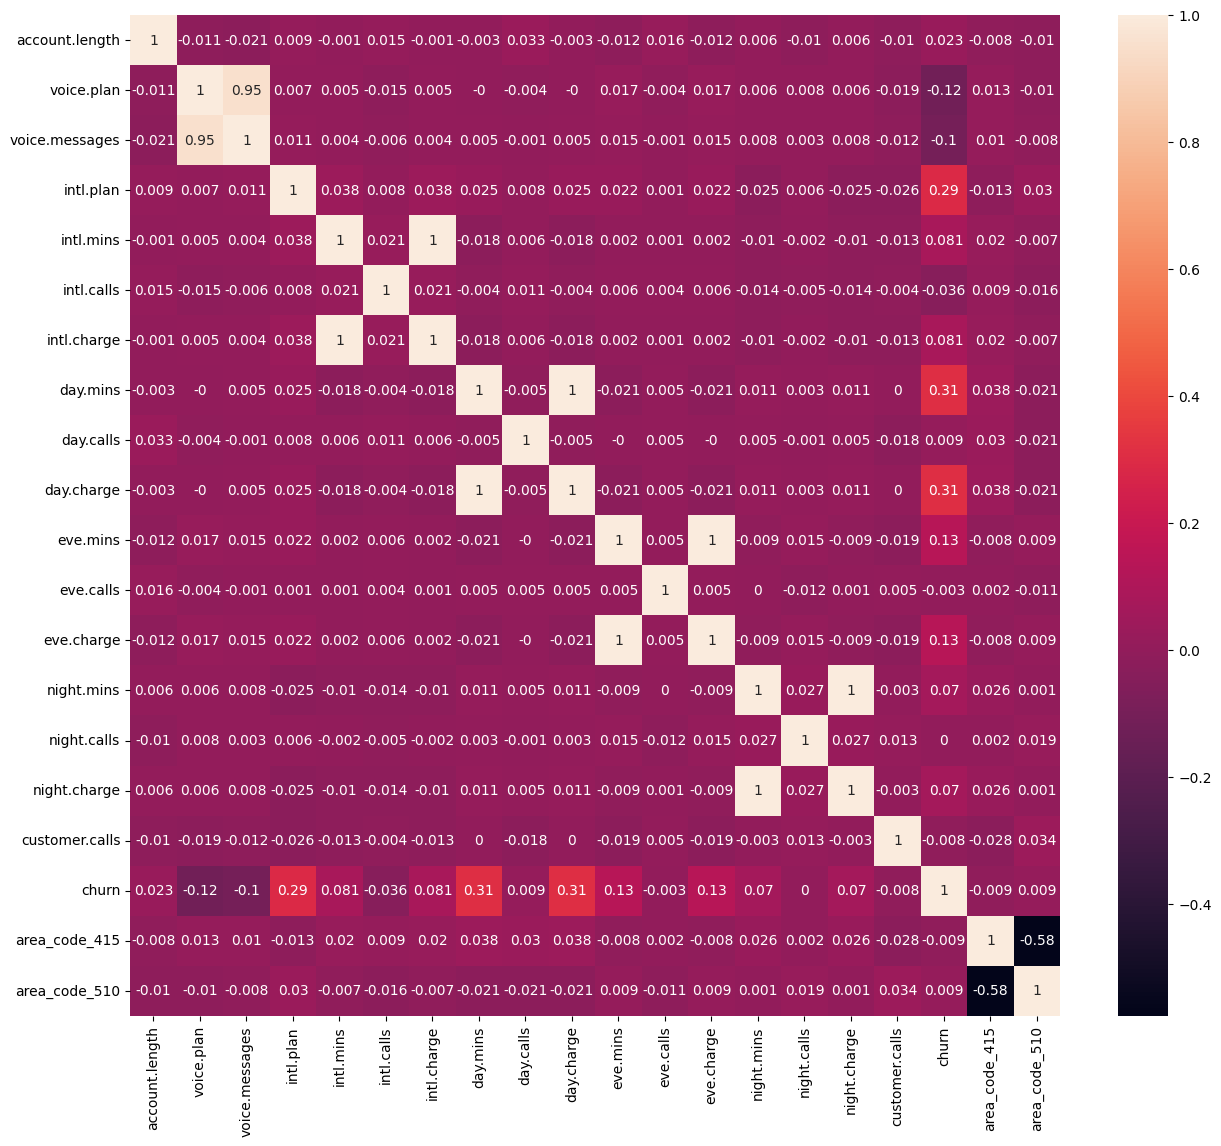

In [31]:
# correlation heatmap
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(numeric_only=True).round(3),annot=True)

### Histograms

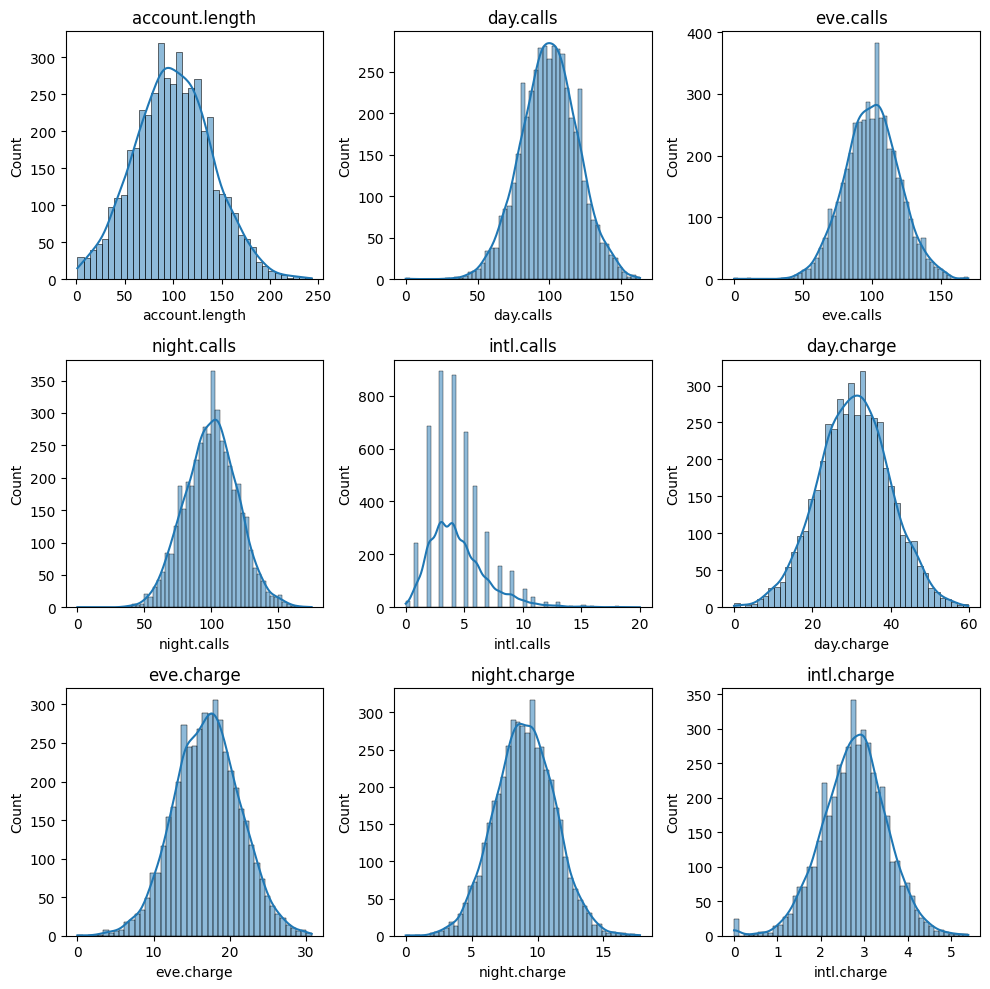

In [32]:
# histograms
col = ['account.length','day.calls','eve.calls','night.calls','intl.calls','day.charge','eve.charge','night.charge','intl.charge']

fig, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()

for i, col_name in enumerate(col):
    sns.histplot(data=df, x=col_name, kde=True, ax=axs[i])
    axs[i].set_title(col_name)

plt.tight_layout()
plt.show()

Most of the plots seems symmetrical. intl.calls is slightly right skewed.

### Box plots


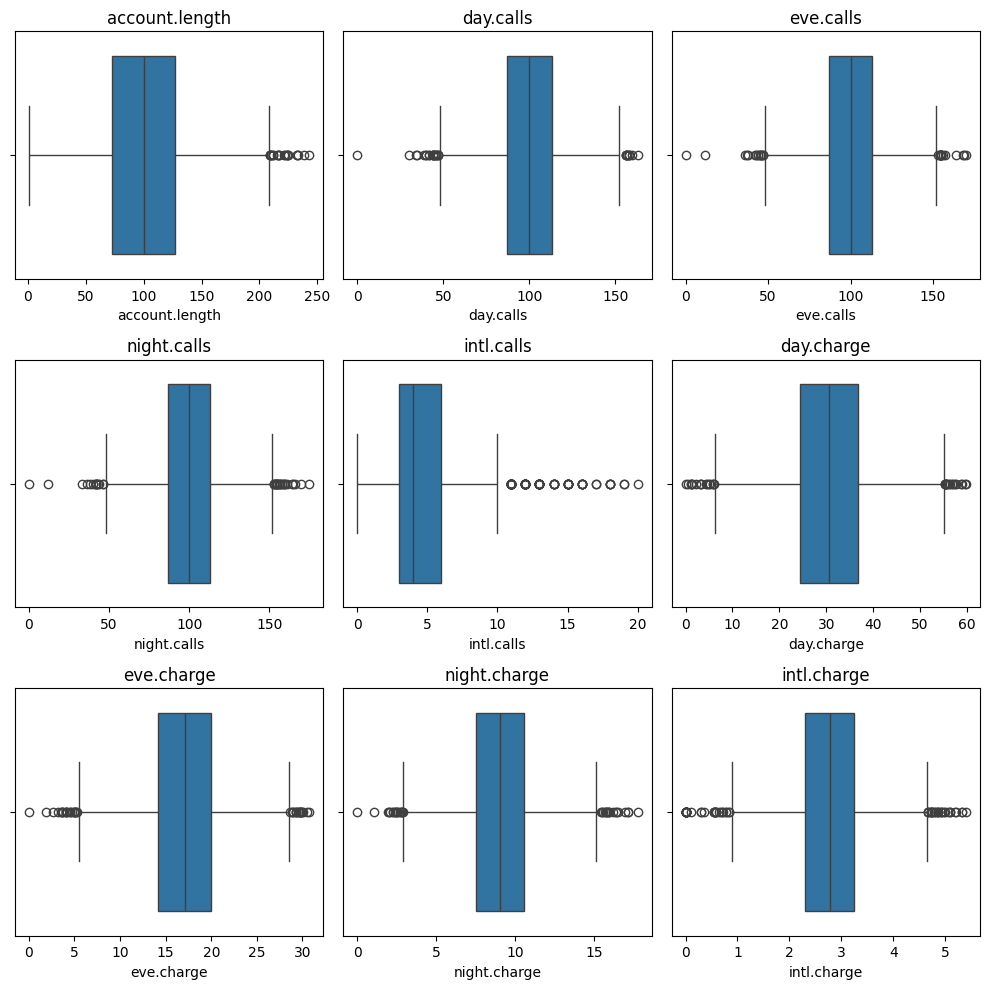

In [33]:
# box plots
col = ['account.length','day.calls','eve.calls','night.calls','intl.calls','day.charge','eve.charge','night.charge','intl.charge']

fig, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()

for i, col_name in enumerate(col):
    sns.boxplot(data=df, x=col_name, ax=axs[i])
    axs[i].set_title(col_name)

plt.tight_layout()
plt.show()

### Pie Charts


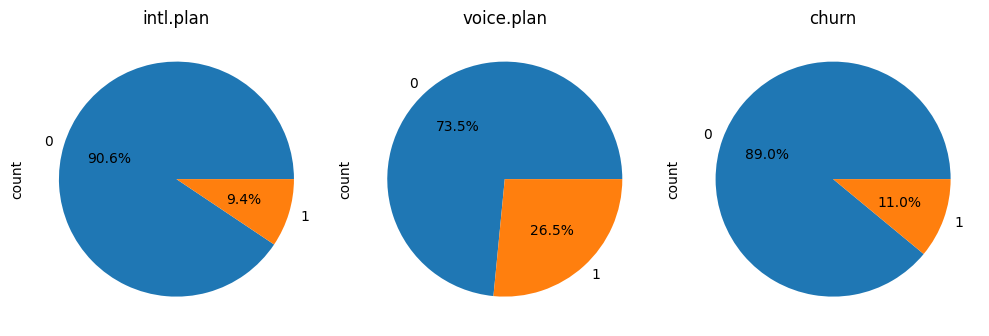

In [34]:
# pie charts
col = ['intl.plan','voice.plan','churn']

fig, axs = plt.subplots(1, 3, figsize=(10,10))
axs = axs.flatten()

for i, col_name in enumerate(col):
    df[col_name].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[i])
    axs[i].set_title(col_name)

plt.tight_layout()
plt.show()

### Countplot

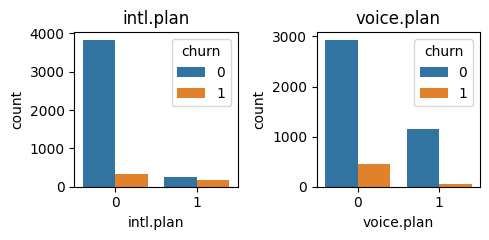

In [35]:
# countplots
col = ['intl.plan','voice.plan']

fig, axs = plt.subplots(1, 2, figsize=(5,2.5))
axs = axs.flatten()

for i, col_name in enumerate(col):
    sns.countplot(data=df, x=col_name, hue='churn', ax=axs[i])
    axs[i].set_title(col_name)

plt.tight_layout()
plt.show()

Churn rate is more for customers who have intl.plan.

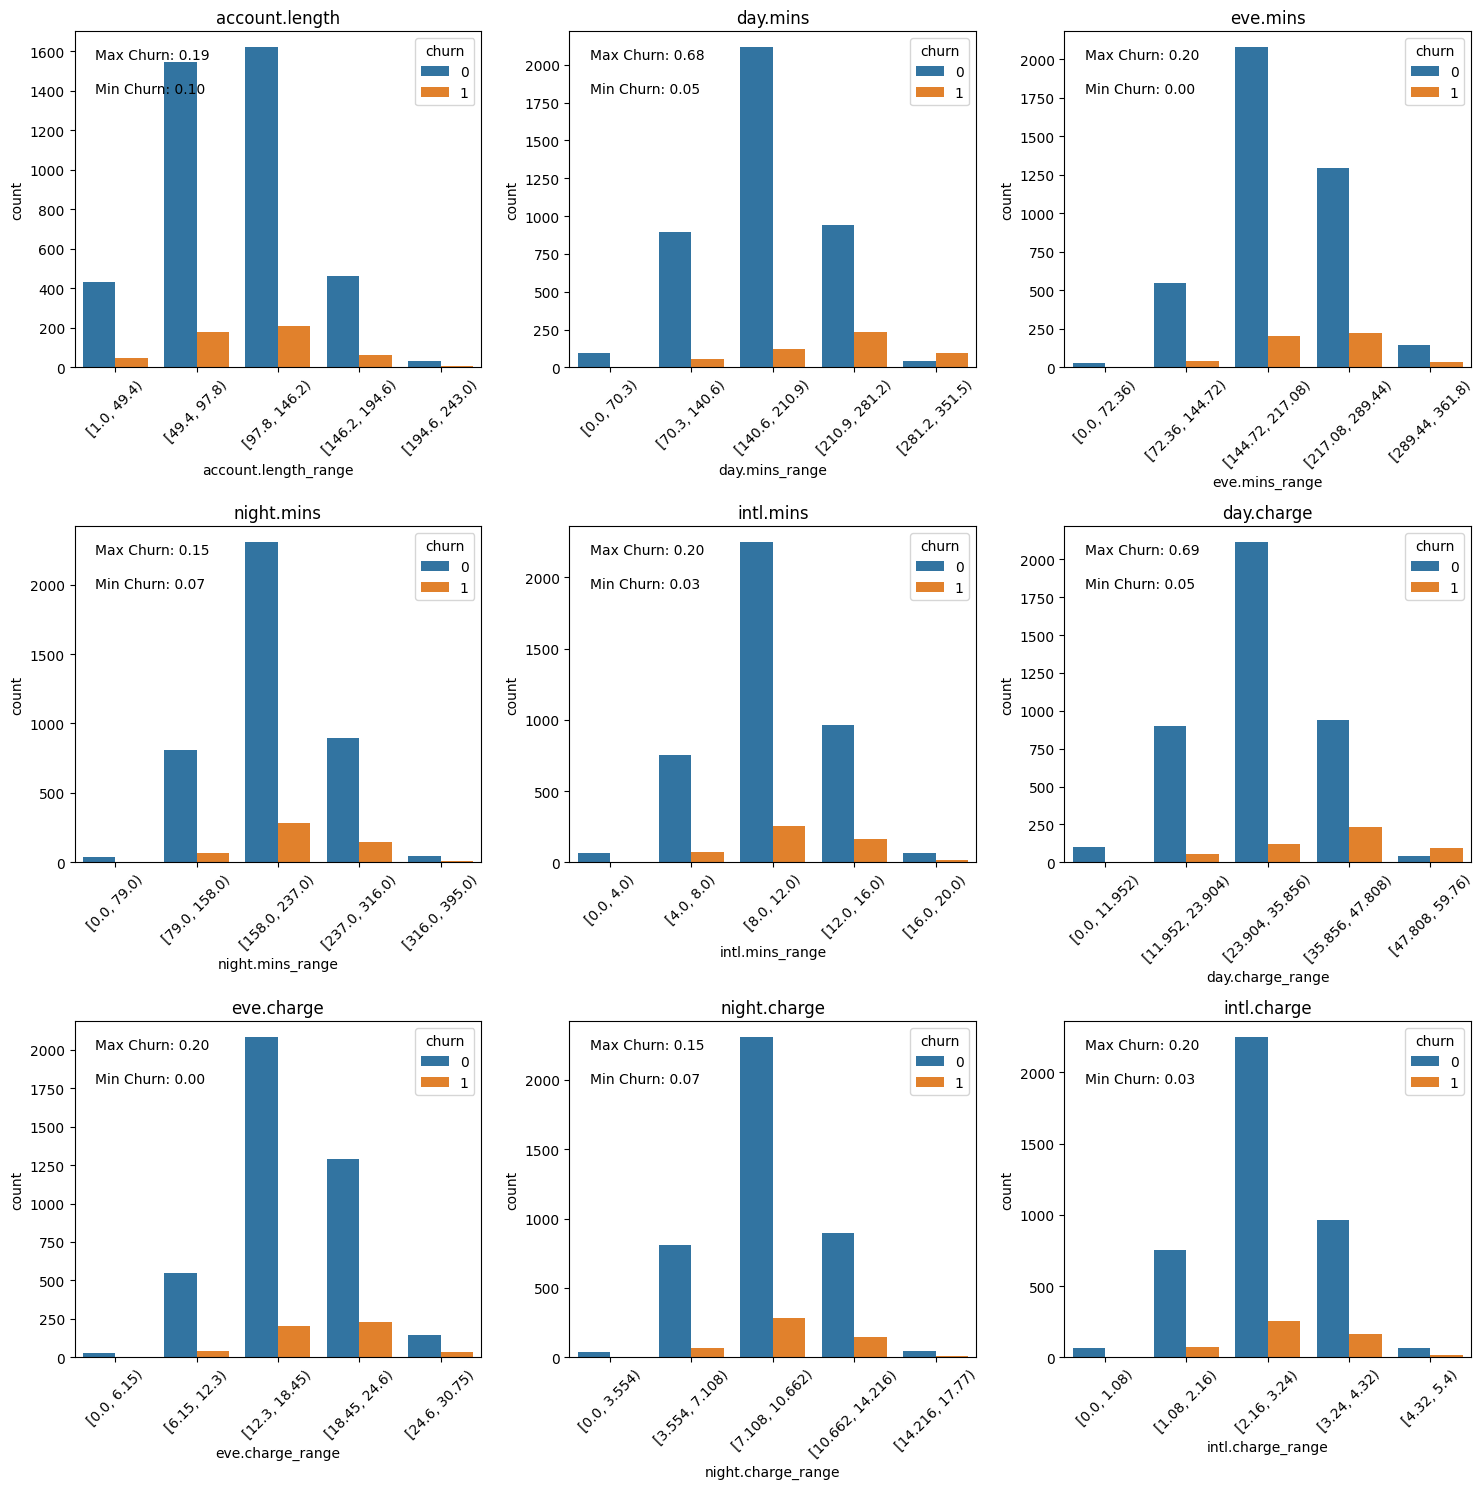

In [36]:
numerical_cols = ['account.length', 'day.mins', 'eve.mins', 'night.mins', 'intl.mins', 'day.charge', 'eve.charge', 'night.charge', 'intl.charge']
def create_count_plots_with_ranges(df, numerical_cols, hue_col='churn'):
    num_plots = len(numerical_cols)
    num_rows = 3
    num_cols = 3

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        min_val = df[col].min()
        max_val = df[col].max()
        range_width = (max_val - min_val) / 5

        df[f'{col}_range'] = pd.cut(df[col], bins=np.arange(min_val, max_val + range_width, range_width), right=False)
        churn_rates = df.groupby(f'{col}_range')[hue_col].mean()

        # Get max and min churn rates
        max_churn_rate = churn_rates.max()
        min_churn_rate = churn_rates.min()

        # Create count plot
        sns.countplot(data=df, x=f'{col}_range', hue=hue_col, ax=axes[i])
        axes[i].set_title(f'{col}')
        axes[i].tick_params(axis='x', rotation=45)

        # Add text for max and min churn rates
        axes[i].text(0.05, 0.95, f'Max Churn: {max_churn_rate:.2f}', transform=axes[i].transAxes, va='top')
        axes[i].text(0.05, 0.85, f'Min Churn: {min_churn_rate:.2f}', transform=axes[i].transAxes, va='top')

        df.drop(columns=[f'{col}_range'], inplace=True)

    plt.tight_layout()
    plt.show()
create_count_plots_with_ranges(df, numerical_cols)

## Data Preprocessing & Feature Engineering

### Data Split

In [37]:
# split data
from sklearn.model_selection import train_test_split
x=df.drop('churn',axis=1)
y=df['churn']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Feature Selection

In [38]:
# Select K Best
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Apply SelectKBest with chi2 for categorical features
bestfeatures_chi2 = SelectKBest(score_func=chi2, k=6)
fit_chi2 = bestfeatures_chi2.fit(x_train,y_train)
dfscores_chi2 = pd.DataFrame(fit_chi2.scores_)
dfcolumns_chi2 = pd.DataFrame(x_train.columns)

featureScores_chi2 = pd.concat([dfcolumns_chi2,dfscores_chi2],axis=1)
featureScores_chi2.columns = ['Specs','Score']
print(featureScores_chi2.nlargest(6,'Score'))
# Make 6 best features set
cols_chi2 = featureScores_chi2.nlargest(6,'Score')['Specs'].values

             Specs        Score
7         day.mins  5557.211991
9       day.charge   944.689818
2   voice.messages   864.739551
10        eve.mins   833.239275
3        intl.plan   285.933133
13      night.mins   162.059401


In [39]:
# RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=6, step=1)
fit = rfe.fit(x_train, y_train)
# selected features names
print(x_train.columns[fit.support_])
# make 6 best features set
cols_rfe = x_train.columns[fit.support_]

Index(['voice.plan', 'intl.plan', 'intl.calls', 'day.mins', 'area_code_415',
       'area_code_510'],
      dtype='object')


In [40]:
# Feature selection using decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
# 6 best features
print([x_train.columns[i] for i in indices[:6]])
cols_dt = [x_train.columns[i] for i in indices[:6]]

['day.charge', 'intl.mins', 'eve.charge', 'intl.calls', 'intl.plan', 'day.mins']


In [41]:
# Union of cols_chi2, cols_rfe, cols_dt
cols = list(set(cols_chi2) | set(cols_rfe) | set(cols_dt))
cols

['intl.plan',
 'day.charge',
 'intl.calls',
 'area_code_415',
 'area_code_510',
 'day.mins',
 'night.mins',
 'eve.mins',
 'eve.charge',
 'voice.messages',
 'voice.plan',
 'intl.mins']

### Normalization

In [42]:
# new train & test dataset
x_train_new = x_train[cols]
x_test_new = x_test[cols]
y_train_new = y_train
y_test_new = y_test

In [43]:
# normalization on training dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_new = scaler.fit_transform(x_train_new)
x_test_new = scaler.transform(x_test_new)

## Model Building & Model Evaluation

### RANDOM FOREST

#### It is a type of bagging technique that uses decision trees as estimators. It creates n decision trees using different set of rows and columns. Each tree is built on different aspects of the data, and the majority class predicted by all the decision trees is returned.

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
random_forest=RandomForestClassifier(n_estimators=50,max_samples=0.9,max_features='sqrt',max_depth=15,bootstrap=True,criterion='entropy')
random_forest.fit(x_train_new,y_train_new)
rf_pred=random_forest.predict(x_test_new)

# {'n_estimators':range(30,70,10),
#  'max_features':['log2','sqrt'],
#  'max_depth':[5,10,15],
#  'max_samples':[0.7,0.8,0.9],
#  'criterion':['gini','entropy']}

# BEST FITS FOR ABOVE ARE:

# {'criterion': 'entropy',
#  'max_depth': 15,
#  'max_features': 'sqrt',
#  'max_samples': 0.9,
#  'n_estimators': 50}


#### Hyper parameter tuning
##### Using grid search to find the optimum values for the attributes.

In [45]:
## Using grid search to find the optimum values for the attributes.
# from sklearn.model_selection import GridSearchCV
# rf_params={'n_estimators':range(30,70,10),'max_features':['log2','sqrt'],'max_depth':[5,10,15],'max_samples':[0.7,0.8,0.9],'criterion':['gini','entropy']}
# rf_grid_search=GridSearchCV(estimator=random_forest,param_grid=rf_params,n_jobs=-1,verbose=3)
# rf_grid_search.fit(x_train_new,y_train_new)
# rf_grid_search.best_params_

In [46]:
print("Accuracy Score :",accuracy_score(y_test_new,rf_pred))
print("--------------- Classification Report ----------------")
print(classification_report(y_test_new,rf_pred))

Accuracy Score : 0.9619978284473398
--------------- Classification Report ----------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       800
           1       1.00      0.71      0.83       121

    accuracy                           0.96       921
   macro avg       0.98      0.86      0.90       921
weighted avg       0.96      0.96      0.96       921



#### Confusion Matrix shows the counts of True Positives, True Negatives, False Positives, and False Negatives.                                   It provides detailed insights into model performance, helping evaluate accuracy, precision, recall, and other metrics.

Text(45.722222222222214, 0.5, 'Actual')

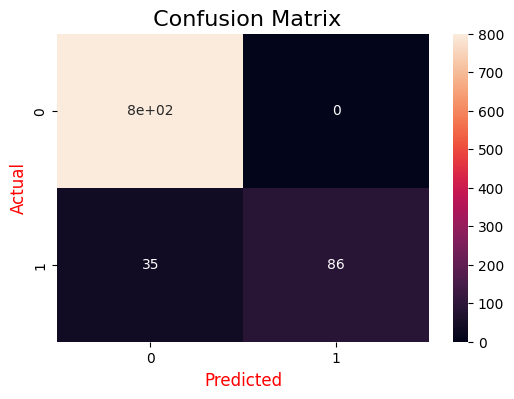

In [47]:
conf_matrix=confusion_matrix(y_test_new,rf_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True)
plt.title(" Confusion Matrix",size=16)
plt.xlabel("Predicted",color='red',size=12)
plt.ylabel("Actual",color='red',size=12)

#### The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different thresholds.                            It uses Area Under the Curve(AUC) to measure the performance of the model.

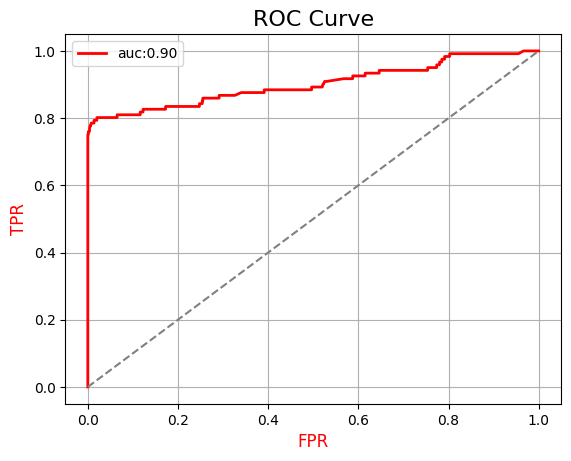

In [48]:
from sklearn.metrics import roc_curve,roc_auc_score
probability=random_forest.predict_proba(x_test_new)[:,1]
auc_score=roc_auc_score(y_test_new,probability)
fpr,tpr,thr=roc_curve(y_test_new,probability)
plt.title("ROC Curve",size=16)
plt.xlabel("FPR",size=12,color='red')
plt.ylabel("TPR",size=12,color='red')
plt.plot(fpr,tpr,color='red',lw=2,label=f'auc:{auc_score:.2f}')
plt.legend(loc='best')
plt.plot([0,1],[0,1],linestyle='--',color='grey')
plt.grid()

### KNN

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [50]:
n_neighbors = np.array(range(1,81))
param_grid_knn = dict(n_neighbors=n_neighbors)
param_grid_knn

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])}

In [51]:
KNN = KNeighborsClassifier()
grid_knn = GridSearchCV(estimator=KNN, param_grid=param_grid_knn)
grid_knn.fit(x_train_new, y_train_new)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])})

In [52]:
print(grid_knn.best_score_)  #To find the best accuracy fit
print(grid_knn.best_params_) #To Find out the number of neighbours for best accuracy

0.9326086956521739
{'n_neighbors': 5}


Size of the Data is 4601
Split this data into 8 splits.

The dataset is split into 8 folds (partitions).


*   4601/8 = 575 obs approx each




In each iteration:




*   1 fold is used as the validation set (test data).
*   7 folds are used as the training set.
*   The process is repeated 8 times (each fold gets a chance to be the validation set exactly once).






In [80]:
pred_knn = KNeighborsClassifier(n_neighbors=5)
pred_knn.fit(x_train_new, y_train_new)
y_pred_knn = pred_knn.predict(x_test_new)
print(classification_report(y_test_new, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       800
           1       0.88      0.48      0.62       121

    accuracy                           0.92       921
   macro avg       0.90      0.73      0.79       921
weighted avg       0.92      0.92      0.91       921



In [53]:
kfold = KFold(n_splits=8)
model_knn = KNeighborsClassifier(n_neighbors=5)
results = cross_val_score(model_knn, x_train_new, y_train_new, cv=kfold)
results_df=pd.DataFrame()
results_df['Split No'] = list(range(8))
results_df['Accuracy %'] = results*100
print("Accuracy =" ,results.mean()*100,'%')
results_df

Accuracy = 93.28804347826087 %


,Split No,Accuracy %
0,0,93.695652
1,1,93.695652
2,2,93.260870
3,3,92.391304
4,4,94.565217
5,5,93.260870
6,6,92.608696
7,7,92.826087


Text(0, 0.5, 'Accuracy %')

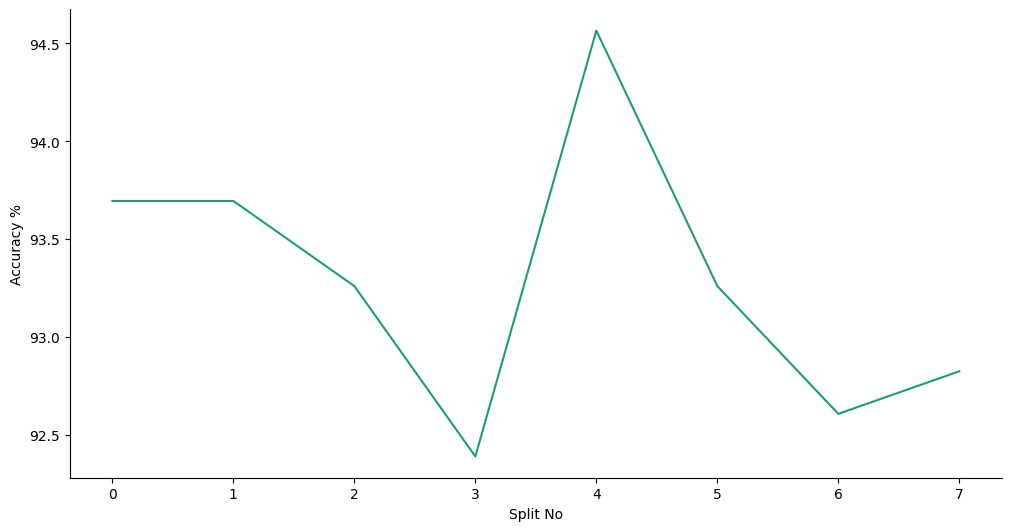

In [54]:
# Split No vs Accuracy

from matplotlib import pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Split No']
    ys = series['Accuracy %']
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('Split No', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Split No')
plt.ylabel('Accuracy %')

### Logistic Regression

In [55]:
# Built a logistic regression model

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)

# Train the model using the training data.
log_reg.fit(x_train_new,y_train_new)

LogisticRegression(max_iter=1000)

In [56]:
y_pred_lr = log_reg.predict(x_test_new)
y_pred_lr

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
# Evaluate the model on the training dataset
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

y_pred_prob_lr = log_reg.predict_proba(x_test_new)[:, 1] if len(y.unique()) == 2 else log_reg.decision_function(x_test_new)
lr_accuracy = accuracy_score(y_test_new, y_pred_lr)
lr_auc = roc_auc_score(y_test_new, y_pred_prob_lr, multi_class='ovr')
print("Accuracy:", lr_accuracy)
print("ROC-AUC Score:", lr_auc)
print("Classification_report:", classification_report(y_test_new, y_pred_lr))
print("Confusion_matrix:", confusion_matrix(y_test_new, y_pred_lr))

Accuracy: 0.8849077090119435
ROC-AUC Score: 0.8686260330578512
Classification_report:               precision    recall  f1-score   support

           0       0.89      0.99      0.94       800
           1       0.70      0.21      0.33       121

    accuracy                           0.88       921
   macro avg       0.80      0.60      0.63       921
weighted avg       0.87      0.88      0.86       921

Confusion_matrix: [[789  11]
 [ 95  26]]


In [58]:
# Logistic Regression with Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(x_train_new,y_train_new)
log_reg_best = grid_lr.best_estimator_

y_pred_lr = log_reg_best.predict(x_test_new)
print("Best Parameters:", grid_lr.best_params_)
print("Accuracy:", lr_accuracy)

Best Parameters: {'C': 100}
Accuracy: 0.8849077090119435


In [63]:
# best fit
model_lr = LogisticRegression(C=100, max_iter=1000)
model_lr.fit(x_train_new, y_train_new)

LogisticRegression(C=100, max_iter=1000)

In [64]:
# classification report
y_pred_lr = model_lr.predict(x_test_new)
print(classification_report(y_test_new, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       800
           1       0.78      0.35      0.48       121

    accuracy                           0.90       921
   macro avg       0.84      0.67      0.71       921
weighted avg       0.89      0.90      0.88       921



### SVM

In [65]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

svm = SVC(probability=True)
param_grid_svm = {'C': [100],  # reguralization
              'gamma': [1],    # kernel coeffecient
              'kernel': ['poly'],
              'degree': [3]}
grid_svm = GridSearchCV(svm, param_grid_svm, refit=True, verbose=3)
grid_svm.fit(x_train_new, y_train_new)
print(grid_svm.best_params_)
print(grid_svm.best_estimator_)


# param_grid = {'C': [0.1, 1, 10, 100],
#               'gamma': [1, 0.1, 0.01, 0.001],
#               'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
#               'degree': [2, 3, 4]}

# Best fit ############ {'C': 100, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}    ###########

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=100, degree=3, gamma=1, kernel=poly;, score=0.955 total time=  14.2s
[CV 2/5] END C=100, degree=3, gamma=1, kernel=poly;, score=0.948 total time=  12.3s
[CV 3/5] END C=100, degree=3, gamma=1, kernel=poly;, score=0.952 total time=  13.9s
[CV 4/5] END C=100, degree=3, gamma=1, kernel=poly;, score=0.954 total time=  13.4s
[CV 5/5] END C=100, degree=3, gamma=1, kernel=poly;, score=0.959 total time=  15.8s
{'C': 100, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
SVC(C=100, gamma=1, kernel='poly', probability=True)


In [66]:
# Confusion matrix
y_pred = grid_svm.predict(x_test_new)
cm = confusion_matrix(y_test_new, y_pred)
print(cm)

[[790  10]
 [ 34  87]]


In [67]:
# classification report
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       800
           1       0.90      0.72      0.80       121

    accuracy                           0.95       921
   macro avg       0.93      0.85      0.89       921
weighted avg       0.95      0.95      0.95       921



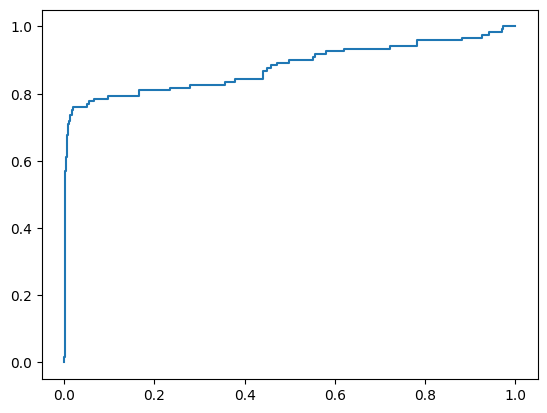

In [68]:
# ROC curve
from sklearn.metrics import roc_curve,roc_auc_score
probability=grid_svm.predict_proba(x_test_new)[:,1]
auc_score=roc_auc_score(y_test_new,probability)
fpr,tpr,thr=roc_curve(y_test_new,probability)

plt.plot(fpr,tpr,label=f'AUC={auc_score:.2f}')


### XGBoost

In [69]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

param_grid_xgb = {
    'n_estimators': [100],      # no of trees
    'max_depth': [5],           # depth of tree
    'learning_rate': [0.1],     # shrinkage / weight updates
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0.1],             # high-simple, low-complex
    'min_child_weight': [5],    # ""
    'random_state': [42],
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss']   # logloss for classificatio
}

# Initialize best_score and best_params to store results
best_score = 0
best_params = {}

# Loop through each combination of hyperparameters
for n_estimators in param_grid_xgb['n_estimators']:
    for max_depth in param_grid_xgb['max_depth']:
        for learning_rate in param_grid_xgb['learning_rate']:
            for subsample in param_grid_xgb['subsample']:
                for colsample_bytree in param_grid_xgb['colsample_bytree']:
                    for gamma in param_grid_xgb['gamma']:
                        for min_child_weight in param_grid_xgb['min_child_weight']:
                          for random_state in param_grid_xgb['random_state']:
                            for objective in param_grid_xgb['objective']:
                                for eval_metric in param_grid_xgb['eval_metric']:
                                  xgb = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                                learning_rate=learning_rate, subsample=subsample,
                                                colsample_bytree=colsample_bytree, gamma=gamma,
                                                min_child_weight=min_child_weight, random_state=random_state,
                                                objective=objective, eval_metric=eval_metric)

                            # Fit the model
                            xgb.fit(x_train_new, y_train_new)

                            # Make predictions
                            y_pred_xgb = xgb.predict(x_test_new)

                            # Calculate accuracy
                            accuracy = accuracy_score(y_test_new, y_pred_xgb)

                            # If the current model has better accuracy, store it
                            if accuracy > best_score:
                                best_score = accuracy
                                best_params = {
                                    'n_estimators': n_estimators,
                                    'max_depth': max_depth,
                                    'learning_rate': learning_rate,
                                    'subsample': subsample,
                                    'colsample_bytree': colsample_bytree,
                                    'gamma': gamma,
                                    'min_child_weight': min_child_weight
                                }

# Print the best parameters and best accuracy
print("Best Parameters Found: ", best_params)
print(f"Best Accuracy: {best_score:.4f}")

# param_grid_xgb = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'gamma': [0, 0.1, 0.2],
#     'min_child_weight': [1, 3, 5]
# }


# Best Parameters Found:  {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.1, 'min_child_weight': 5}
# Best Accuracy: 0.9696

Best Parameters Found:  {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.1, 'min_child_weight': 5}
Best Accuracy: 0.9685


In [70]:
# confusion matrix
y_pred_xgb = xgb.predict(x_test_new)
cm = confusion_matrix(y_test_new, y_pred_xgb)
print(cm)

[[800   0]
 [ 29  92]]


In [71]:
# classification report
print(classification_report(y_test_new, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       800
           1       1.00      0.76      0.86       121

    accuracy                           0.97       921
   macro avg       0.98      0.88      0.92       921
weighted avg       0.97      0.97      0.97       921



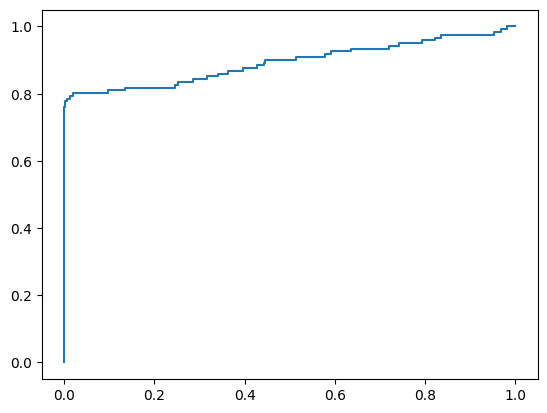

In [72]:
# ROC curve
from sklearn.metrics import roc_curve,roc_auc_score
probability=xgb.predict_proba(x_test_new)[:,1]
auc_score=roc_auc_score(y_test_new,probability)
fpr,tpr,thr=roc_curve(y_test_new,probability)

plt.plot(fpr,tpr,label=f'AUC={auc_score:.2f}')

### ANN

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [74]:
ann_model = Sequential([
    Dense(128, activation='relu', input_dim=x_train_new.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [75]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann_model.fit(x_train_new, y_train_new, epochs=50, batch_size=32, validation_data=(x_test_new, y_test_new))

Epoch 1/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8758 - loss: 0.4315 - val_accuracy: 0.8686 - val_loss: 0.3676
Epoch 2/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8966 - loss: 0.2919 - val_accuracy: 0.8697 - val_loss: 0.3265
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8898 - loss: 0.2856 - val_accuracy: 0.8751 - val_loss: 0.3036
Epoch 4/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8917 - loss: 0.2723 - val_accuracy: 0.8697 - val_loss: 0.3566
Epoch 5/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8920 - loss: 0.2606 - val_accuracy: 0.8751 - val_loss: 0.2861
Epoch 6/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8988 - loss: 0.2470 - val_accuracy: 0.8773 - val_loss: 0.3011
Epoch 7/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8973 - loss: 0.2713 - val_accuracy: 0.8849 - val_loss: 0.2761
Epoch 8/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9033 - loss: 0.2390 - val_accuracy: 0.

In [76]:
loss, accuracy = ann_model.evaluate(x_test_new, y_test_new)
print(f"Test Accuracy: {accuracy:.2f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9364 - loss: 0.2069 
Test Accuracy: 0.94


In [77]:
# classification report
y_pred_ann = ann_model.predict(x_test_new)
y_pred_ann = (y_pred_ann > 0.5).astype(int)
print(classification_report(y_test_new, y_pred_ann))

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       800
           1       0.82      0.74      0.78       121

    accuracy                           0.94       921
   macro avg       0.89      0.86      0.87       921
weighted avg       0.94      0.94      0.94       921



## Model Evaluation

In [86]:
# Evaluating models
models = pd.DataFrame({
    'Model': ['Random Forest', 'KNN', 'Logistic Regression', 'SVM', 'XGBoost', 'ANN'],
    'Accuracy': [accuracy_score(y_test_new, rf_pred), accuracy_score(y_test_new, y_pred_knn), accuracy_score(y_test_new, y_pred_lr), accuracy_score(y_test_new, y_pred), accuracy_score(y_test_new, y_pred_xgb), accuracy_score(y_test_new, y_pred_ann)],
})

models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,XGBoost,0.968512
0,Random Forest,0.961998
3,SVM,0.952226
5,ANN,0.944625
1,KNN,0.922910
2,Logistic Regression,0.901194


In [88]:
# best fit
final_model = xgb.fit(x_train_new, y_train_new)

## Deployment

In [89]:
# deployment
import pickle
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)
    print("Model saved successfully!")

Model saved successfully!
